In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
dt = spark.read.csv('ws2_data.csv', header = True, inferSchema = True, )

In [58]:
dt.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [59]:
# Data Profiling
dt.summary("count").show()

+-------+---------+-------+-------+-------+------+
|summary|timestamp|user_id|book_id|country| price|
+-------+---------+-------+-------+-------+------+
|  count|   500000| 499998| 500000| 500000|500000|
+-------+---------+-------+-------+-------+------+



In [60]:
dt.where( dt.user_id.isNull()).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



In [61]:
dt.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [62]:
# Data Cleansing 01
# เปลี่ยน timestamp จาก String เป็น Datetime เพื่อให้เราสามารถเล่นกับเวลาและวันที่ได้
from pyspark.sql import functions as f

dt_clean = dt.withColumn("timestamp",
                        f.to_timestamp(dt.timestamp, 'yyyy-mm-dd HH:mm:ss')
                        )
dt_clean.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [63]:
# หา Lexical errors จาก Column Country
dt_clean.select("country").distinct().count()

58

In [70]:
# ใช้ Spark SQL ในการดึงข้อมูลจาก Spark DataFrame
dt.createOrReplaceTempView("data")
dt_sql_country = spark.sql("""
SELECT DISTINCT country
FROM data
ORDER BY country
""")
dt_sql_country.show(58)

+--------------------+
|             Country|
+--------------------+
|             Algeria|
|           Argentina|
|           Australia|
|             Austria|
|             Bahamas|
|             Belgium|
|              Brazil|
|              Canada|
|               China|
|            Colombia|
|             Croatia|
|             Denmark|
|               Dubai|
|               Egypt|
|             Estonia|
|             Finland|
|              France|
|             Germany|
|              Greece|
|             Hungary|
|               India|
|           Indonesia|
|             Ireland|
|              Israel|
|               Italy|
|             Jamaica|
|               Japan|
|              Japane|
|               Kenya|
|              Kuwait|
|            Malaysia|
|            Maldives|
|              Mexico|
|          Montenegro|
|         Netherlands|
|         New Zealand|
|             Nigeria|
|              Norway|
|            Pakistan|
|                Peru|
|         P

In [74]:
# จะเห็นว่ามีประเทศ Japane ซึ่งไม่มีอยู่จริงและน่าจะหมายถึงประเทศ Japan 
# เมื่อลองเรียกข้อมูลประเทศ Japane ออกมาดูจะเห็นว่ามีข้อมุลที่กรอกผิดไม่น้อย

dt_sql_japane = spark.sql("""
SELECT * 
FROM data
WHERE country = 'Japane'
""")
dt_sql_japane.show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|   1129| Japane|29.65|
|2021-05-02 10:27:42|a6052e97|   1466| Japane| 35.0|
|2021-05-04 10:44:41|a0f44c26|   1497| Japane|17.49|
|2021-05-04 05:40:46|ad0f9907|   2269| Japane|35.71|
|2021-05-05 01:08:25|aa169f5d|   1378| Japane|59.93|
|2021-05-04 17:42:32|a28e3c68|   1411| Japane|29.99|
|2021-05-05 16:29:39|a909212e|   1652| Japane|24.99|
|2021-05-06 23:10:29|a7b05d98|   1420| Japane|30.79|
|2021-05-07 22:18:42|a169255e|   1459| Japane|25.08|
|2021-05-08 06:06:15|ab2159d6|   1035| Japane|22.67|
|2021-05-09 02:46:06|a6cba2fc|   1928| Japane|  7.0|
|2021-05-09 12:12:35|a0e31842|   1358| Japane|34.99|
|2021-05-11 16:33:19|a2bc5460|   1616| Japane|29.65|
|2021-05-12 22:32:52|af75e4d1|   1603| Japane|18.89|
|2021-05-12 19:14:33|a0accb45|   1934| Japane| 1.95|
|2021-05-13 05:23:12|abfe1e79|   1368| Japane|

In [82]:
# แก้ไขจาก Japane เป็น Japan
dt_sql_result = spark.sql("""
SELECT timestamp, user_id, book_id,
    CASE WHEN country = 'Japane' THEN 'Japan' ELSE country END AS country,
price
FROM data
""")
dt_sql_result.select("country").distinct().sort("country").show(58)

+--------------------+
|             country|
+--------------------+
|             Algeria|
|           Argentina|
|           Australia|
|             Austria|
|             Bahamas|
|             Belgium|
|              Brazil|
|              Canada|
|               China|
|            Colombia|
|             Croatia|
|             Denmark|
|               Dubai|
|               Egypt|
|             Estonia|
|             Finland|
|              France|
|             Germany|
|              Greece|
|             Hungary|
|               India|
|           Indonesia|
|             Ireland|
|              Israel|
|               Italy|
|             Jamaica|
|               Japan|
|               Kenya|
|              Kuwait|
|            Malaysia|
|            Maldives|
|              Mexico|
|          Montenegro|
|         Netherlands|
|         New Zealand|
|             Nigeria|
|              Norway|
|            Pakistan|
|                Peru|
|         Philippines|
|          

In [83]:
# ข้อมูล user_id ของเราเป็นตัวอักษร a-z และตัวเลข 0-9 รวมกันอยู่ 8 ตัว 
# เราลองเช็คดูว่ามีตัวที่ไม่เป็นไปตามเงื่อนไขนี้มั้ย ด้วยการเช็ครูปแบบ Regular Expression

dt_check_userid = spark.sql("""
SELECT *
FROM data
WHERE user_id NOT RLIKE '^[a-z0-9]{8}$'
""")
dt_check_userid.show()

+-------------------+----------+-------+--------------------+-----+
|          timestamp|   user_id|book_id|             country|price|
+-------------------+----------+-------+--------------------+-----+
|2021-06-19 16:00:22|ca86d17200|   2269|United States of ...|35.71|
|2021-07-15 18:53:09|ca86d17200|    322|United States of ...|30.79|
+-------------------+----------+-------+--------------------+-----+



In [85]:
dt_sql_userid_result = spark.sql("""
SELECT timestamp,
CASE WHEN user_id = 'ca86d17200' THEN 'ca86d172' ELSE user_id END AS user_id,
book_id, country, price
FROM data
""")

dt_sql_userid_result.where( dt_sql_userid_result.user_id == 'ca86d17200' ).show()

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



In [91]:
dt_nullist = spark.sql("""
SELECT timestamp,
CASE WHEN user_id is NULL THEN '000000' ELSE user_id END AS user_id,
book_id, country, price
FROM data
""")

dt_nullist.where( dt_nullist.user_id.isNull() ).show()

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



In [92]:
dt_nullist.where( dt_nullist.user_id == '000000').show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20| 000000|    516| Brazil|27.37|
|2021-06-30 02:27:00| 000000|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



In [101]:
# หา outlier หรือข้อมุลที่ค่าสูงเกินปกติ โดยใช้

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dt_pd = dt.toPandas()

<AxesSubplot:xlabel='price'>

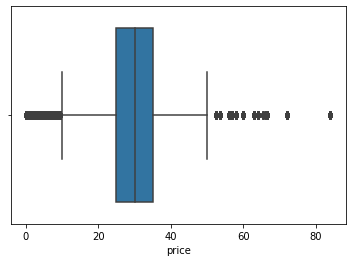

In [106]:
sns.boxplot(x = dt_pd['price'])

In [107]:
dt.where( dt.user_id.isNull()).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+

